# Problem Statement: Cat and Dog Image Classification using CNN

### Background:
You are working on a computer vision project to develop an image classification system that can distinguish between images of cats and dogs. The dataset consists of a large number of labeled images of cats and dogs. Your task is to design and train a Convolutional Neural Network (CNN) model that can accurately classify new, unseen images into the correct categories: "Cat" or "Dog."

### Dataset:
The dataset contains thousands of images of cats and dogs, with each image labeled as either "Cat" or "Dog." The images have variations in terms of backgrounds, poses, and appearances.

### Objective:
Build a CNN model to classify images as either "Cat" or "Dog" with high accuracy. The trained model should be capable of generalizing well to new images it hasn't seen during training.

# Import necessary libraries

In [1]:
import numpy as np              # NumPy for numerical operations
import pandas as pd             # Pandas for data analysis and manipulation
import tensorflow as tf         # TensorFlow for machine and deep learning tasks
import matplotlib.pyplot as plt # Matplotlib and seaborn for plotting (data visualization)
import seaborn as sns
import random                   # Random for generating random values
import os                       # OS for interacting with the operating system

import warnings                 # Warnings for handling warning messages
from warnings import filterwarnings 
warnings.filterwarnings('ignore') # Ignore warnings to enhance code readability


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Prepare Traning Data

In [3]:
names = os.listdir("train") # Get the list of file names in the "train" directory
categories = [] 
for name in names:
    animal_name = name.split('.')[0] # Extract animal names from the file names
    # Assign a binary labels: 1 -> 'dog' and 0 -> 'cat'
    if animal_name == 'dog':
        categories.append(1)
    elif animal_name == 'cat':
        categories.append(0)
# Create a dataframe to organize the names and labels
df = pd.DataFrame({'File_name': names, 'Target': categories})

In [4]:
df.head()

File_name  Target
0     cat.0.jpg       0
1     cat.1.jpg       0
2    cat.10.jpg       0
3   cat.100.jpg       0
4  cat.1000.jpg       0

In [5]:
df.tail()

File_name  Target
4894  dog.995.jpg       1
4895  dog.996.jpg       1
4896  dog.997.jpg       1
4897  dog.998.jpg       1
4898  dog.999.jpg       1

In [6]:
df['Target'].value_counts()

Target
1    2500
0    2399
Name: count, dtype: int64

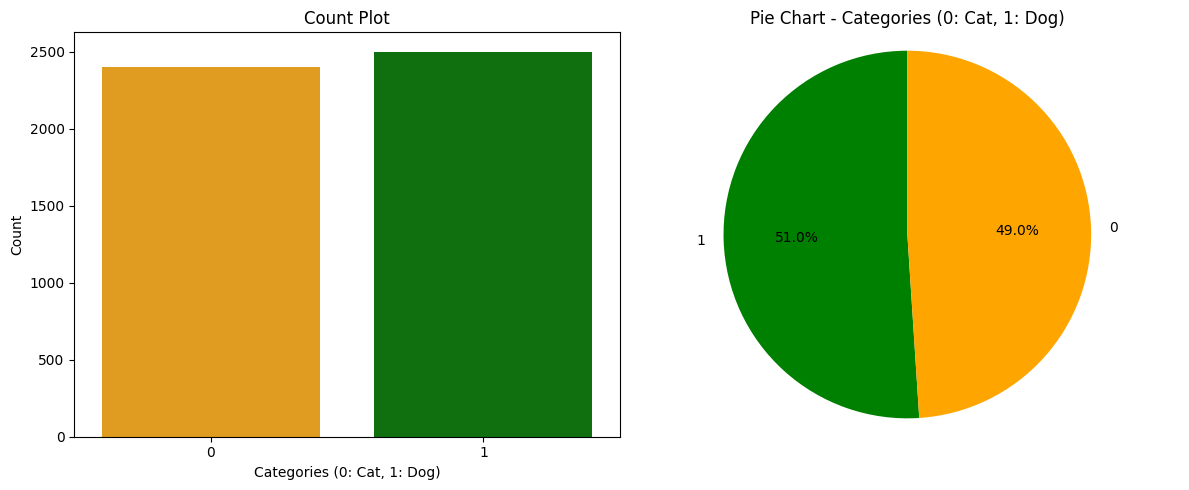

In [7]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
palette_colors = {'0': 'orange', '1': 'green'}

# Count plot
sns.countplot(x='Target', data=df, palette=palette_colors, ax=axes[0])
axes[0].set_title("Count Plot")
axes[0].set_xlabel('Categories (0: Cat, 1: Dog)')
axes[0].set_ylabel('Count')

# Pie chart
colors = ['green', 'orange']
category_counts = df['Target'].value_counts()
axes[1].pie(category_counts, labels=category_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title("Pie Chart - Categories (0: Cat, 1: Dog)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [8]:
df['Target'] = df['Target'].apply(lambda x: 'Cat' if x == 0 else 'Dog')

In [9]:
df

File_name Target
0        cat.0.jpg    Cat
1        cat.1.jpg    Cat
2       cat.10.jpg    Cat
3      cat.100.jpg    Cat
4     cat.1000.jpg    Cat
...            ...    ...
4894   dog.995.jpg    Dog
4895   dog.996.jpg    Dog
4896   dog.997.jpg    Dog
4897   dog.998.jpg    Dog
4898   dog.999.jpg    Dog

[4899 rows x 2 columns]

### Conclusion
* In this specific scenario, both categories (0 and 1) have a comparable number of data points (2500 and 2399).
* As the class distribution is relatively balanced, there is no immediate need for data balancing techniques.
* This balanced distribution can contribute to model training without introducing bias towards a particular class.

In [10]:
sample = random.choice(names) # Choose a random name from the 'names' list
image = load_img("train/"+sample)

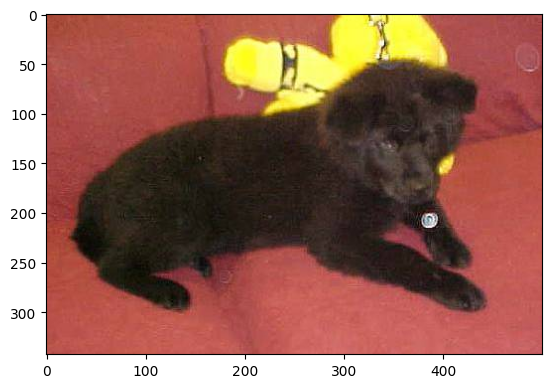

In [11]:

plt.imshow(image) # Display the loaded image using Matplotlib
plt.show()

# CNN
* In the context of neural networks, and particularly Convolutional Neural Networks (CNNs), convolution is used to process and extract features from input data.

### Conv2D:

* Convolutional Operation: Conv2D stands for 2D convolutional layer. It performs a convolution operation on 2D input data, commonly used in image processing.

* Feature Extraction: It is a key component of Convolutional Neural Networks (CNNs) for feature extraction. The layer applies filters to the input data to detect patterns and features.

* Kernel/Filter: The convolutional layer uses a small matrix called a kernel or filter. This filter slides over the input data, computing the dot product and producing a feature map.

* Strides: The convolution operation involves moving the filter with a certain step size called strides. Strides determine how much the filter moves across the input data at each step.

* Padding: Padding is often applied to the input data to ensure that the convolution operation covers the entire input. It helps maintain spatial dimensions and can be 'valid' (no padding) or 'same' (zero-padding).

* Channels: In the context of images, Conv2D operates on multiple channels (e.g., RGB channels in color images). The filters are applied independently to each channel.

* Activation Function: Conv2D layers often include an activation function (e.g., ReLU) to introduce non-linearity and capture complex relationships in the data.

* Feature Map: The output of a Conv2D layer is a feature map, representing the learned features of the input data.

* Parameters: Conv2D has parameters like the number of filters, filter size, activation function, etc., which are tuned during the training process.



### Min-Max Normalization:

* Normalization: Min-Max Scaling, also known as Min-Max Normalization or Feature Scaling, is a technique used to normalize the pixel values of input images in a CNN.

* Range Transformation: It transforms the pixel values of the input data to a specific range, typically [0, 1]. This is achieved by scaling the values based on the minimum and maximum values in the original dataset.

* Formula: The formula for Min-Max Scaling is given by: (X - Xmin)/(Xmax - Xmin).

* Purpose: Min-Max Scaling is applied to ensure that all pixel values lie within a standardized range. This can help in improving the convergence of the CNN during training. Scaling the input data can prevent certain features with larger numerical values from dominating the learning process. It can make the optimization algorithm more stable and improve the model's ability to learn meaningful patterns.

* TensorFlow/Keras Example: In TensorFlow/Keras, Min-Max Scaling can be implemented using the MinMaxScaler class from the sklearn.preprocessing module. Alternatively, it can be done manually using the formula mentioned above.

* Alternative Scaling Methods: Besides Min-Max Scaling, other normalization techniques like Z-score normalization (subtracting mean and dividing by standard deviation) are also used in CNNs.



### Pooling

* Pooling Operation: Pooling is a down-sampling operation used in CNNs to reduce the spatial dimensions of the input data, typically performed after convolutional layers.

* Purpose: The main goal of pooling is to decrease the computational complexity and memory requirements of the network, as well as to make the learned features more invariant to small translations and distortions.

* Types of Pooling: There are two common types of pooling used in CNNs:

    * Max Pooling: Takes the maximum value from a group of values in the input, Emphasizes the most important feature in the region.
    * Average Pooling: Takes the average value from a group of values in the input, Smoothens the representation and reduces sensitivity to noise.

* Pooling Window (Kernel): Pooling is performed using a small window (kernel) that slides over the input data. The window extracts values from a region, and pooling is applied to these values.

* Strides: Similar to convolution, pooling involves moving the pooling window with a certain step size called strides. Strides determine how much the window moves across the input data at each step.

* Pooling Size: The size of the pooling window determines the spatial extent of pooling. Common choices are 2x2 or 3x3 windows.

* Pooling Layer: Pooling is typically applied using pooling layers, such as MaxPooling2D or AveragePooling2D, in the architecture of a CNN.

* Effect on Dimensions: Pooling reduces the spatial dimensions (width and height) of the input data, but the number of channels remains the same.

* Downsampling: Pooling results in downsampling, which helps in retaining important features while reducing the overall size of the data.

* Location Invariance: Pooling introduces a level of location invariance by considering the most important features in a local region rather than their specific spatial location.



### Significance of RelU Activation in CNN:

* Non-linearity:

    * Purpose: ReLU introduces non-linearity to the network.
    * Effect: Neural networks without non-linear activation functions would be equivalent to a linear model, making them less capable of learning complex patterns and relationships in the data.

* Simplicity of Calculation: ReLU is computationally efficient and easy to calculate, involving a simple thresholding operation. This simplicity contributes to faster training times.

* Avoiding Vanishing Gradient Problem:

    * Vanishing Gradient: ReLU helps mitigate the vanishing gradient problem, where gradients become extremely small during backpropagation in deep networks using activation functions like sigmoid or tanh. This problem can hinder the training of deep networks.
    * Non-zero Gradient: ReLU has a non-zero gradient for positive inputs, allowing for more effective gradient flow during backpropagation.
    Sparsity:

* Sparsity in Activation: ReLU activation induces sparsity in the activation of neurons. Neurons that receive negative inputs output zero, effectively turning them off. This sparsity can lead to a more efficient representation of features.



### Flattening

* Transition to Fully Connected Layers:

    * Purpose: After convolutional and pooling layers extract hierarchical features from input data, the flattened representation is used as input to fully connected layers for making predictions or classifications.
    * Fully Connected Layers: Fully connected layers require one-dimensional input, whereas the output of convolutional and pooling layers is usually in the form of 3D tensors (height, width, channels).

* Shape Transformation:

    * Conversion to 1D Vector: Flattening reshapes the 3D tensor into a 1D vector, where all the spatial information is laid out sequentially. The channel information is also included in this vector.
    * Example: If the output tensor shape after convolutional layers is (4, 4, 64), flattening transforms it into a vector of size 1024 (4 * 4 * 64).

* Implementation in CNN Architecture:

    * Layer Type: Flattening is not associated with a specific layer type but is often represented as a separate operation or layer in the CNN architecture.
    * Example (in Keras): In Keras, the Flatten layer can be added to the model architecture to perform flattening.

* Connection to Dense Layers:

    * Dense Layer Input: Fully connected or dense layers expect a flat, one-dimensional input. Flattening bridges the gap between the spatially organized feature maps and the dense layers that operate on a vector.

* Loss of Spatial Information:

    * Spatial Relationships: While flattening is necessary for connecting to dense layers, it leads to a loss of spatial relationships between features. This loss is compensated by the hierarchical feature extraction in preceding convolutional layers.

# Flow Chart

    Input (height, width, channels) -> Conv2D (filters, kernel_size, activation) -> MaxPooling (pool_size) 

                                            |
                                            v
                                            .
                                            .
                                            |
                                            v

    Conv2D (filters, kernel_size, activation) -> MaxPooling (pool_size) 

                                            |
                                            v

    Flatten -> Dense (neurons, activation) -> Dense (output_neurons, output_activation)


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
# Define the Sequential model
model = Sequential()
# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # 32 filters, 3x3 kernel, ReLU activation, input shape (128, 128, 3)
model.add(BatchNormalization())  # Batch normalization for stable training
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling with a 2x2 pool size
model.add(Dropout(0.25))  # Dropout for regularization
# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))  # 64 filters, 3x3 kernel, ReLU activation
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))  # 128 filters, 3x3 kernel, ReLU activation
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Fourth Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu'))  # 256 filters, 3x3 kernel, ReLU activation
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten Layer
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))  # 512 neurons, ReLU activation
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Output Layer
model.add(Dense(2, activation='softmax'))  # 2 output neurons for cat and dog classes, softmax activation
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Display model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)      

# Callbacks
* Callbacks are functions or objects in deep learning frameworks like TensorFlow and Keras that allow you to perform actions at different stages during the training of a neural network. 

* Callbacks are useful for monitoring and controlling the training process, making it more flexible and adaptive. They can be applied to both Convolutional Neural Networks (CNNs) and Artificial Neural Networks (ANNs).

### Benefits:

* Model Saving: Ensures that the best model is saved during training.
* Early Stopping: Prevents overfitting and saves computational resources.
* Dynamic Learning Rate: Adjusts learning rates for better convergence.
* Real-time Monitoring: Provides insights into the training process.

### Assumption:
* In order to avoid overfitting, we will stop the learning process after 8 epochs if the validation loss value does not decrease.
* If the accuracy does not improve for 3 consecutive steps, we will decrease the learning rate.

In [13]:
# Import EarlyStopping and ReduceLROnPlateau callbacks from Keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create an EarlyStopping callback with patience set to 8
earlystop = EarlyStopping(patience=8)

# Create a ReduceLROnPlateau callback
    # - Monitor the validation accuracy ('val_acc')
    # - Patience of 3 epochs before reducing learning rate
    # - Verbose mode for logging (1: display messages, 0: silent)
    # - Reduce learning rate by a factor of 0.5 when triggered
    # - Set the minimum learning rate to 0.00001
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# Combine both callbacks into a list
callbacks = [earlystop, learning_rate_reduction]


# Data Preparation
Due to time and memory constraints, I provided the model with a few examples, and then ran it for a few epochs.

In [14]:
train_df, validate_df = train_test_split(df, test_size=0.30, random_state=41)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

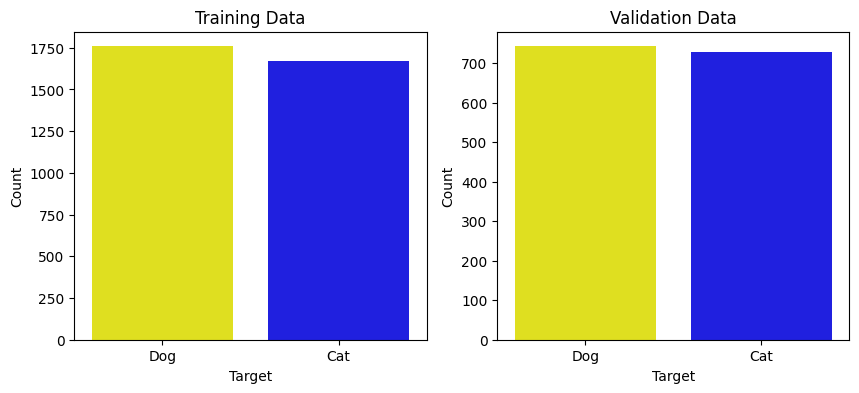

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  # Adjust figsize as needed

# Assign the color palette for the plots
palette_colors = {'Cat': 'blue', 'Dog': 'yellow'}

# Create count plot for training data
sns.countplot(x='Target', data=train_df, palette=palette_colors, ax=axes[0])
axes[0].set_title("Training Data")
axes[0].set_ylabel('Count')

# Create count plot for validation data
sns.countplot(x='Target', data=validate_df, palette=palette_colors, ax=axes[1])
axes[1].set_title("Validation Data")
axes[1].set_ylabel('Count')

# Show the subplots
plt.show()


### ImageDataGenerator
An ImageDataGenerator is a tool commonly used for data augmentation during the training of the model. Data augmentation involves creating new training examples by applying various transformations to the existing dataset. The ImageDataGenerator generates augmented images by performing operations such as rotation, zooming, horizontal and vertical flips, and other transformations. The primary purposes of using an ImageDataGenerator are: 

* Increasing Dataset Size: Data augmentation helps in artificially expanding the size of the training dataset, providing more diverse examples for the model to learn from. This is particularly useful when the original dataset is limited.

* Enhancing Generalization: Augmenting the training data with variations makes the model more robust and aids in better generalization to unseen data. It helps the model learn invariant features and improves its ability to recognize patterns under different conditions.

* Preventing Overfitting: Data augmentation serves as a regularization technique by introducing variability during training. This can help prevent the model from memorizing specific patterns in the training data (overfitting) and encourages it to focus on learning more general features.

In [17]:
# Training Generator Configuration
train_data_generator_config = ImageDataGenerator(
    rotation_range=15,             # Random rotation within the specified range
    rescale=1./255,                # Rescaling pixel values to the range [0, 1]
    shear_range=0.1,               # Shear transformation for augmenting training data
    zoom_range=0.2,                # Random zooming of images
    horizontal_flip=True,          # Random horizontal flipping for augmentation
    width_shift_range=0.1,         # Random horizontal shifting
    height_shift_range=0.1         # Random vertical shifting
)

# Creating Training Data Generator from DataFrame
train_generator = train_data_generator_config.flow_from_dataframe(
    train_df,                       # DataFrame containing file names and target labels
    "train/",                       # Path to the training data directory
    x_col='File_name',              # Column containing file names
    y_col='Target',                 # Column containing target labels
    target_size=(128, 128),         # Size to which images will be resized during loading
    class_mode='categorical',       # Mode for yielding the target data (categorical for one-hot encoded labels)
    batch_size=15                   # Batch size involves generating 15 distinct augmented images for each original image during the training process
)


Found 3429 validated image filenames belonging to 2 classes.


In [18]:
# Validation Generator Configuration
validation_data_generator_config = ImageDataGenerator(rescale=1./255)  # Rescaling pixel values to the range [0, 1] (no need to do the rest because we are validating the data)

# Creating Validation Data Generator from DataFrame
validation_generator = validation_data_generator_config.flow_from_dataframe(
    validate_df,                     # DataFrame containing file names and target labels for validation
    "train/",                        # Path to the training data directory (assuming it's the same as for training)
    x_col='File_name',               # Column containing file names
    y_col='Target',                  # Column containing target labels
    target_size=(128, 128),          # Size to which images will be resized during loading
    class_mode='categorical',        # Mode for yielding the target data (categorical for one-hot encoded labels)
    batch_size=15                    # Batch size involves generating 15 distinct augmented images for each original image during the validation process
)


Found 1470 validated image filenames belonging to 2 classes.


In [19]:
# Let's consider a sample image
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_data_generator_config.flow_from_dataframe(
    example_df, 
    "train/", 
    x_col='File_name',
    y_col='Target',
    target_size=(128, 128),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


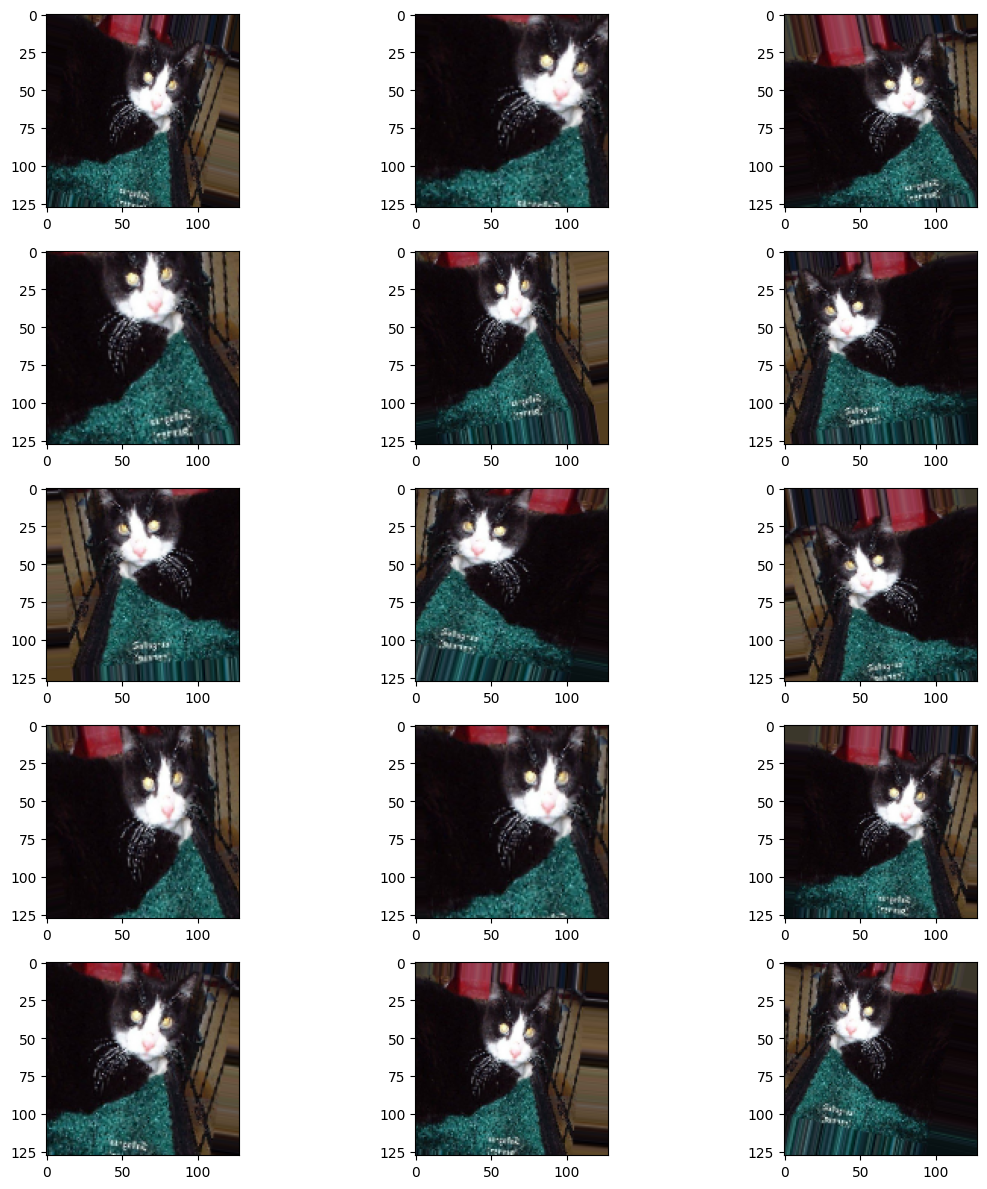

In [21]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit Model

In [23]:
# Define the number of training epochs
epochs = 20

# Get the total number of samples in the training and validation datasets
total_train_len = train_df.shape[0]
total_validate_len = validate_df.shape[0]

# Specify the batch size for processing during each iteration
batch_size = 15

# Train the model using the fit_generator method
history = model.fit_generator(
    train_generator,  # Training data generator
    epochs=epochs,  # Number of training epochs
    validation_data=validation_generator,  # Validation data generator
    validation_steps=total_validate_len // batch_size,  # Number of validation steps per epoch
    steps_per_epoch=total_train_len // batch_size,  # Number of training steps per epoch
    callbacks=callbacks  # List of callback functions to be applied during training
)


Epoch 1/20
228/228 [==============================] - 92s 401ms/step - loss: 1.0520 - accuracy: 0.5615 - val_loss: 1.4448 - val_accuracy: 0.4932 - lr: 0.0010
Epoch 2/20
228/228 [==============================] - 51s 224ms/step - loss: 0.7688 - accuracy: 0.5999 - val_loss: 0.9010 - val_accuracy: 0.5653 - lr: 0.0010
Epoch 3/20
228/228 [==============================] - 47s 204ms/step - loss: 0.6980 - accuracy: 0.6248 - val_loss: 1.0213 - val_accuracy: 0.5422 - lr: 0.0010
Epoch 4/20
228/228 [==============================] - 47s 206ms/step - loss: 0.6475 - accuracy: 0.6506 - val_loss: 0.6970 - val_accuracy: 0.6265 - lr: 0.0010
Epoch 5/20
228/228 [==============================] - 47s 205ms/step - loss: 0.6143 - accuracy: 0.6878 - val_loss: 0.5666 - val_accuracy: 0.7102 - lr: 0.0010
Epoch 6/20
228/228 [==============================] - 49s 214ms/step - loss: 0.6093 - accuracy: 0.6816 - val_loss: 0.6452 - val_accuracy: 0.6524 - lr: 0.0010
Epoch 7/20
228/228 [==============================] 

# Save Model

In [25]:
model.save_weights("classification_model.h5")

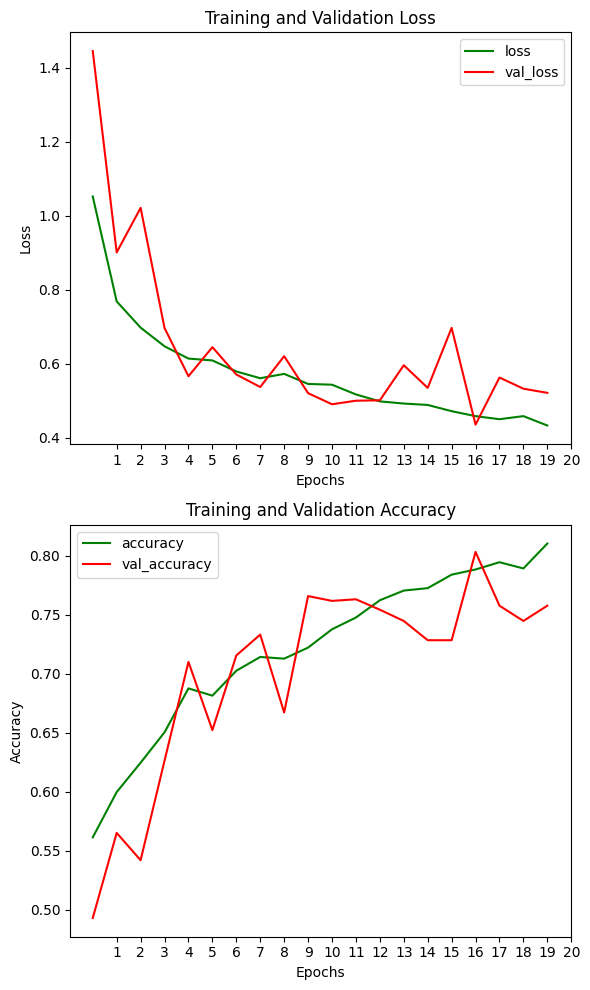

In [26]:
# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

# Create subplots using Seaborn and Matplotlib
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

# Plotting loss
sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax1, palette=['g', 'r'], dashes=False)
ax1.set_xticks(range(1, len(history_df) + 1))
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')

# Plotting accuracy
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax2, palette=['g', 'r'], dashes=False)
ax2.set_xticks(range(1, len(history_df) + 1))
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Conclusion:
* We can continue with further training as the validation loss consistently decreases, and concurrently, the validation accuracy demonstrates a steady increase from the first to the twentieth epoch in the context of the Artificial Neural Network (ANN) model.
* However, due to time constraints, I am halting the model training process. If you have the flexibility, you may consider training the model using the entire dataset for more comprehensive results.

# Prepare Testing Data

In [29]:
# Get the list of file names in the "test/test/" directory
test_file_names = os.listdir("test/test/")
# Create a test DataFrame using the first 1000 file names
test_df = pd.DataFrame({
    'File_name': test_file_names[:1000]
})



# Create Testing Generator

In [30]:
# Define an ImageDataGenerator for test data with rescaling
test_gen = ImageDataGenerator(rescale=1./255)
# Create a test data generator using flow_from_dataframe
test_generator = test_gen.flow_from_dataframe(
    test_df,  # DataFrame containing information about test files
    "test/test/",  # Directory path for test images
    x_col='File_name',  # Column in the DataFrame containing file names
    y_col=None,  # No labels are provided (class_mode=None)
    class_mode=None,  # No labels are used for this generator
    target_size=(128, 128),  # Resize images to the specified target size
    batch_size=batch_size,  # Batch size for processing during evaluation
    shuffle=False  # Do not shuffle the data
)


Found 1000 validated image filenames.


# Predict the new data

In [31]:
test_generator

In [34]:
test_df_length = test_df.shape[0]
predict_data = model.predict_generator(test_generator, steps=np.ceil(test_df_length/batch_size))

In [35]:
predict_data

array([[0.2922084 , 0.7077917 ],
       [0.75248325, 0.2475168 ],
       [0.36977682, 0.6302232 ],
       ...,
       [0.60139996, 0.39860004],
       [0.7333657 , 0.26663432],
       [0.4895038 , 0.5104962 ]], dtype=float32)


* For categorical classification, predictions provide probabilities for each category. To determine the predicted category, we select the one with the highest probability, calculated using the numpy average maximum function.

In [38]:
test_df['category'] = np.argmax(predict, axis=1)
test_df['category']

0      1
1      0
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    1
Name: category, Length: 1000, dtype: int64

In [39]:
test_df['category'] = test_df['category'].replace({ 1 : 'dog', 0 : 'cat' })

### Visualize the predicted results alongside corresponding images

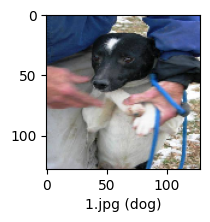

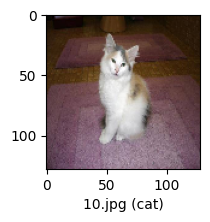

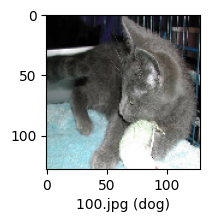

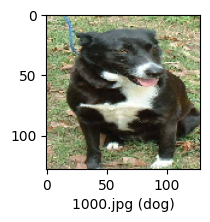

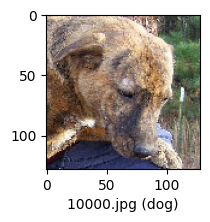

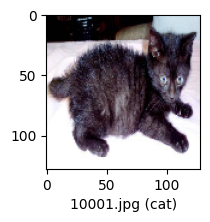

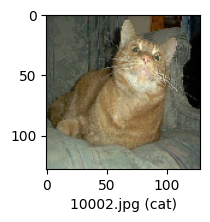

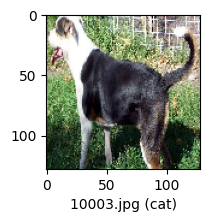

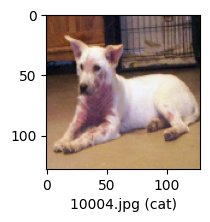

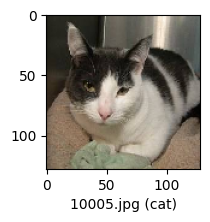

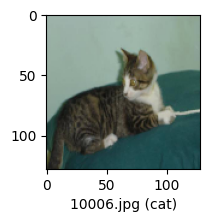

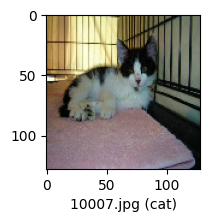

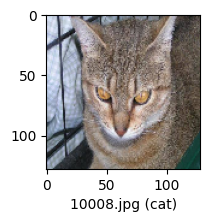

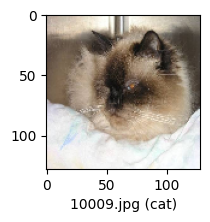

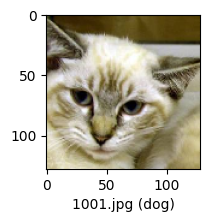

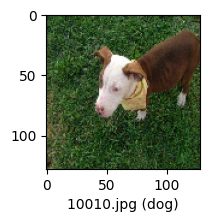

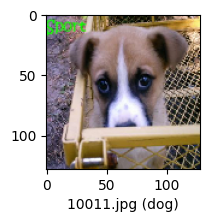

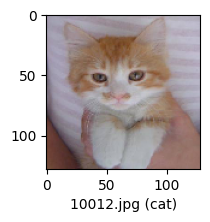

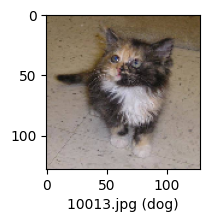

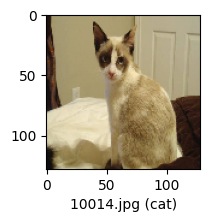

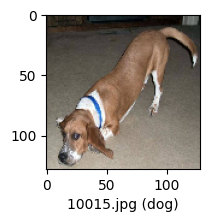

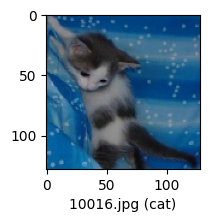

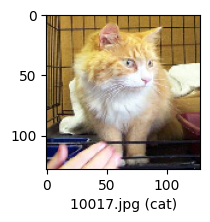

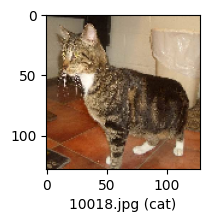

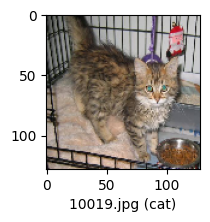

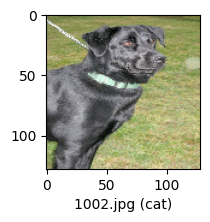

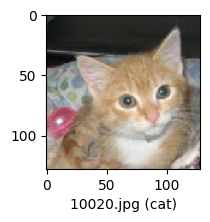

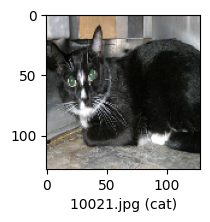

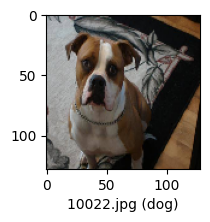

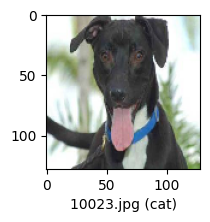

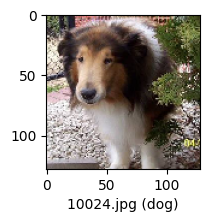

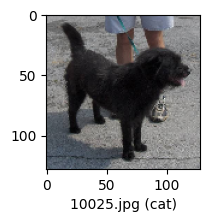

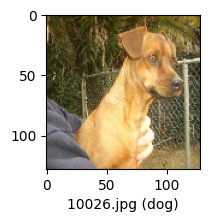

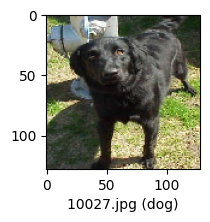

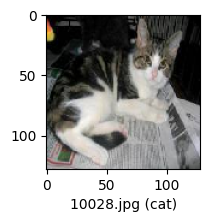

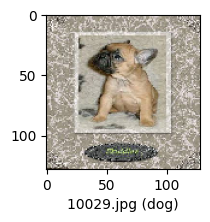

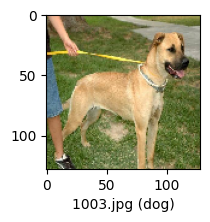

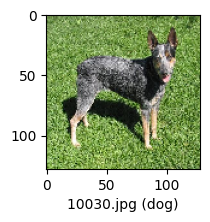

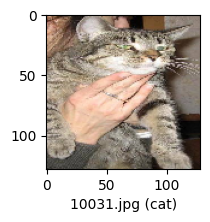

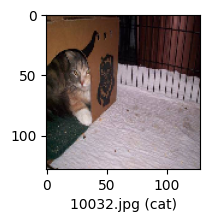

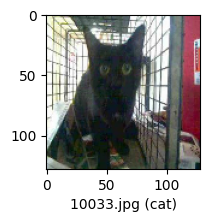

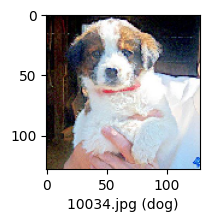

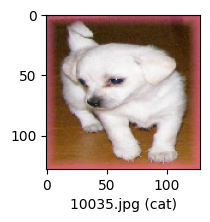

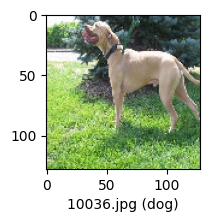

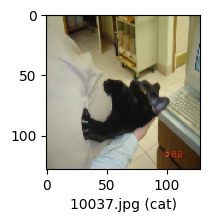

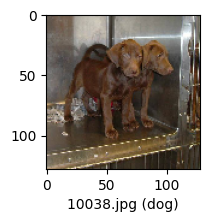

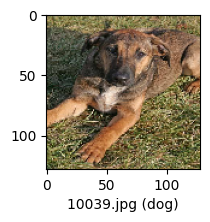

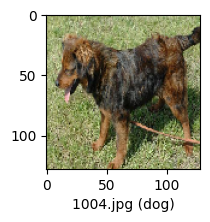

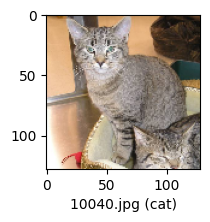

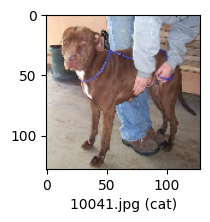

In [41]:
# Display the first 50 images from the test dataset with predicted categories
for index, row in test_df.head(50).iterrows():
    # Set up the plot for each image
    plt.figure(figsize=(3, 2))

    # Extract filename and category information
    filename = row['File_name']
    category = row['category']

    # Load and display the image
    img = load_img("test/test/" + filename, target_size=(128, 128))
    plt.imshow(img)

    # Add filename and category as labels
    plt.xlabel(f"{filename} ({category})")

    # Show the plot for each image
    plt.show()
